In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

seed = 1234
torch.manual_seed(seed)
np.random.seed(seed)

%matplotlib inline

#### Implement a perceptron

In [2]:
class Perceptron(nn.Module):
    '''One linear layer'''
    def __init__(self, input_dim):
        '''input_dim (int): size of the input features'''
        super(Perceptron, self).__init__()
        # Linear class does the affline transform and bookkeeping for weights and biases
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x_in):
        '''Forward Pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
            x_in.shape should be (batch, num_features)
            
        Returns:
            the resulting tensor. shape should be (batch, ).
            '''
        return torch.sigmoid(self.fc1(x_in)).squeeze()
        

#### Sigmoid activation function

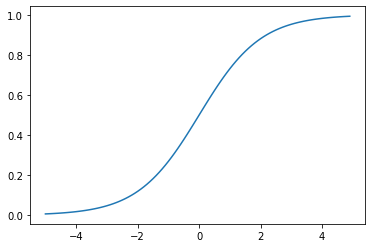

In [3]:
x = torch.arange(-5., 5., step=0.1)
y = torch.sigmoid(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

#### Tanh activation function

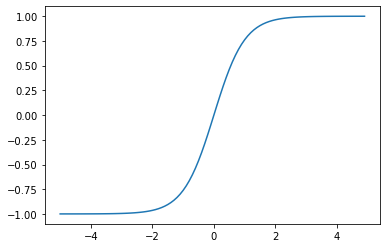

In [4]:
x = torch.arange(-5., 5., step=0.1)
y = torch.tanh(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

#### ReLU activation function

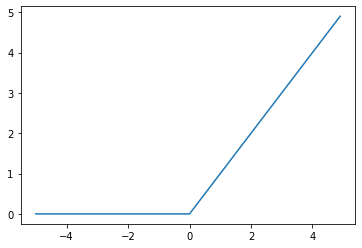

In [5]:
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., step=0.1)
y = relu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

#### PReLU (Parametric) activation function

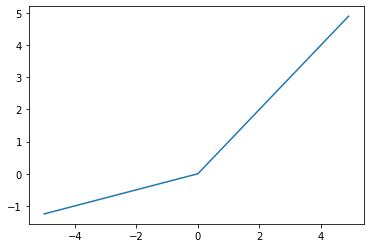

In [6]:
prelu = torch.nn.PReLU()
x = torch.arange(-5., 5., step=0.1)
y = prelu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

#### Softmax activation function

In [7]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.0461,  0.4024, -1.0115]])
tensor([[0.3603, 0.5145, 0.1251]])
tensor([1.0000])


#### MSE loss function

In [8]:
mse_loss = nn.MSELoss()
# network output y_hat
outputs = torch.randn(3, 5, requires_grad=True)
# target y
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(0.9380, grad_fn=<MseLossBackward>)


#### Cross-entropy loss

In [9]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
# representing the class for each input
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.6537, grad_fn=<NllLossBackward>)


#### Binary cross-entropy loss

In [14]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
# binary prob. output vector using the sigmoid on a random vector that represents the output of the network
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.8633],
        [0.6590],
        [0.4415],
        [0.4923]], grad_fn=<SigmoidBackward>)
tensor(0.6796, grad_fn=<BinaryCrossEntropyBackward>)


#### END 